## 1. Package Load

In [1]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image

import pandas as pd
import numpy as np
import pydotplus
import seaborn as sns

1. Import **DecisionTreeClassifier** from **skelarn.tree** for decision tree practice.
2. Import **classification_report, confusion_matrix** from **sklearn.metrics** for evaluation.
3. Import **IPython.display** from **Image** for data visualization.

## 2. Data Load

In [2]:
country_clf = pd.read_csv('economic-variables-country-erased.csv')
country_clf

,imfGDP,gdpPerCapita,pop,eu_or_not,class
0,2.220000e+13,67063.2695,331002.651,not,advanced
1,1.550000e+13,10746.7828,1439323.776,not,newly
2,5.500000e+12,43450.1405,126476.461,not,advanced
3,4.160000e+12,49617.1450,83783.942,eu,advanced
4,3.260000e+12,2360.6592,1380004.385,not,newly
...,...,...,...,...,...
206,0.000000e+00,1278.9308,220892.340,not,developing
207,0.000000e+00,22496.8653,15.003,not,developing
208,0.000000e+00,1890.2804,43849.260,not,developing
209,0.000000e+00,1266.4138,17500.658,not,developing


## 3. Data Preprocessing

In [3]:
country_clf = country_clf.replace('advanced', 0)
country_clf = country_clf.replace('newly', 1)
country_clf = country_clf.replace('developing', 2)

country_clf = country_clf.replace('eu', 3)
country_clf = country_clf.replace('not', 4)

country_clf

,imfGDP,gdpPerCapita,pop,eu_or_not,class
0,2.220000e+13,67063.2695,331002.651,4,0
1,1.550000e+13,10746.7828,1439323.776,4,1
2,5.500000e+12,43450.1405,126476.461,4,0
3,4.160000e+12,49617.1450,83783.942,3,0
4,3.260000e+12,2360.6592,1380004.385,4,1
...,...,...,...,...,...
206,0.000000e+00,1278.9308,220892.340,4,2
207,0.000000e+00,22496.8653,15.003,4,2
208,0.000000e+00,1890.2804,43849.260,4,2
209,0.000000e+00,1266.4138,17500.658,4,2


1. Converting **string** values to **numerical(dummy)** values.

## 4. Seperating Attributes and Classes

In [4]:
X = np.array(pd.DataFrame(country_clf, columns = ['imfGDP', 'gdpPerCapita', 'pop', 'eu_or_not']))
y = np.array(pd.DataFrame(country_clf, columns = ['class']))

In [5]:
X[:10]

array([[2.22000000e+13, 6.70632695e+04, 3.31002651e+05, 4.00000000e+00],
       [1.55000000e+13, 1.07467828e+04, 1.43932378e+06, 4.00000000e+00],
       [5.50000000e+12, 4.34501405e+04, 1.26476461e+05, 4.00000000e+00],
       [4.16000000e+12, 4.96171450e+04, 8.37839420e+04, 3.00000000e+00],
       [3.26000000e+12, 2.36065920e+03, 1.38000439e+06, 4.00000000e+00],
       [2.93000000e+12, 4.31175725e+04, 6.78860110e+04, 3.00000000e+00],
       [2.88000000e+12, 4.40615183e+04, 6.52735110e+04, 3.00000000e+00],
       [2.09000000e+12, 3.45747083e+04, 6.04618260e+04, 3.00000000e+00],
       [2.06000000e+12, 9.70316930e+03, 2.12559417e+05, 4.00000000e+00],
       [1.83000000e+12, 4.85528727e+04, 3.77421540e+04, 4.00000000e+00]])

1. Checking the head of numpy array.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

1. Splitting train, test set using **train_test_split**.

In [7]:
X_train[:5]

array([[3.3620000e+10, 7.3500790e+02, 4.5741007e+04, 4.0000000e+00],
       [0.0000000e+00, 3.2127191e+04, 3.0231000e+01, 4.0000000e+00],
       [3.1400000e+11, 1.6402893e+04, 1.9116201e+04, 4.0000000e+00],
       [0.0000000e+00, 6.5125570e+02, 2.5778816e+04, 4.0000000e+00],
       [0.0000000e+00, 2.6261542e+03, 5.1014140e+03, 4.0000000e+00]])

In [8]:
X_test[:5]

array([[2.28000000e+08, 3.85200200e+03, 5.91900000e+01, 4.00000000e+00],
       [4.16000000e+12, 4.96171450e+04, 8.37839420e+04, 3.00000000e+00],
       [4.02000000e+11, 5.36261196e+04, 7.49698100e+03, 4.00000000e+00],
       [3.91900000e+09, 6.68050840e+03, 5.86632000e+02, 4.00000000e+00],
       [3.30350000e+10, 1.13378930e+03, 2.91368080e+04, 4.00000000e+00]])

In [9]:
y_train[:5]

array([[2],
       [2],
       [1],
       [2],
       [2]])

In [10]:
y_test[:5]

array([[2],
       [0],
       [1],
       [2],
       [2]])

1. Checking the head of train, test set.

## 5. Data Learning Process

In [11]:
dt_clf = DecisionTreeClassifier()

In [12]:
dt_clf = dt_clf.fit(X_train, y_train)

In [13]:
dt_prediction = dt_clf.predict(X_test)

## 6. Data Visualizaiton

In [14]:
feature_names = country_clf.columns.tolist()

In [15]:
feature_names = feature_names[0:4]

In [16]:
feature_names

['imfGDP', 'gdpPerCapita', 'pop', 'eu_or_not']

In [17]:
target_name = np.array(['Advanced', 'Newly', 'Developing'])

In [18]:
dt_dot_data = tree.export_graphviz(dt_clf, out_file = None,
                                  feature_names = feature_names,
                                  class_names = target_name,
                                  filled = True, rounded = True,
                                  special_characters = True)

In [19]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

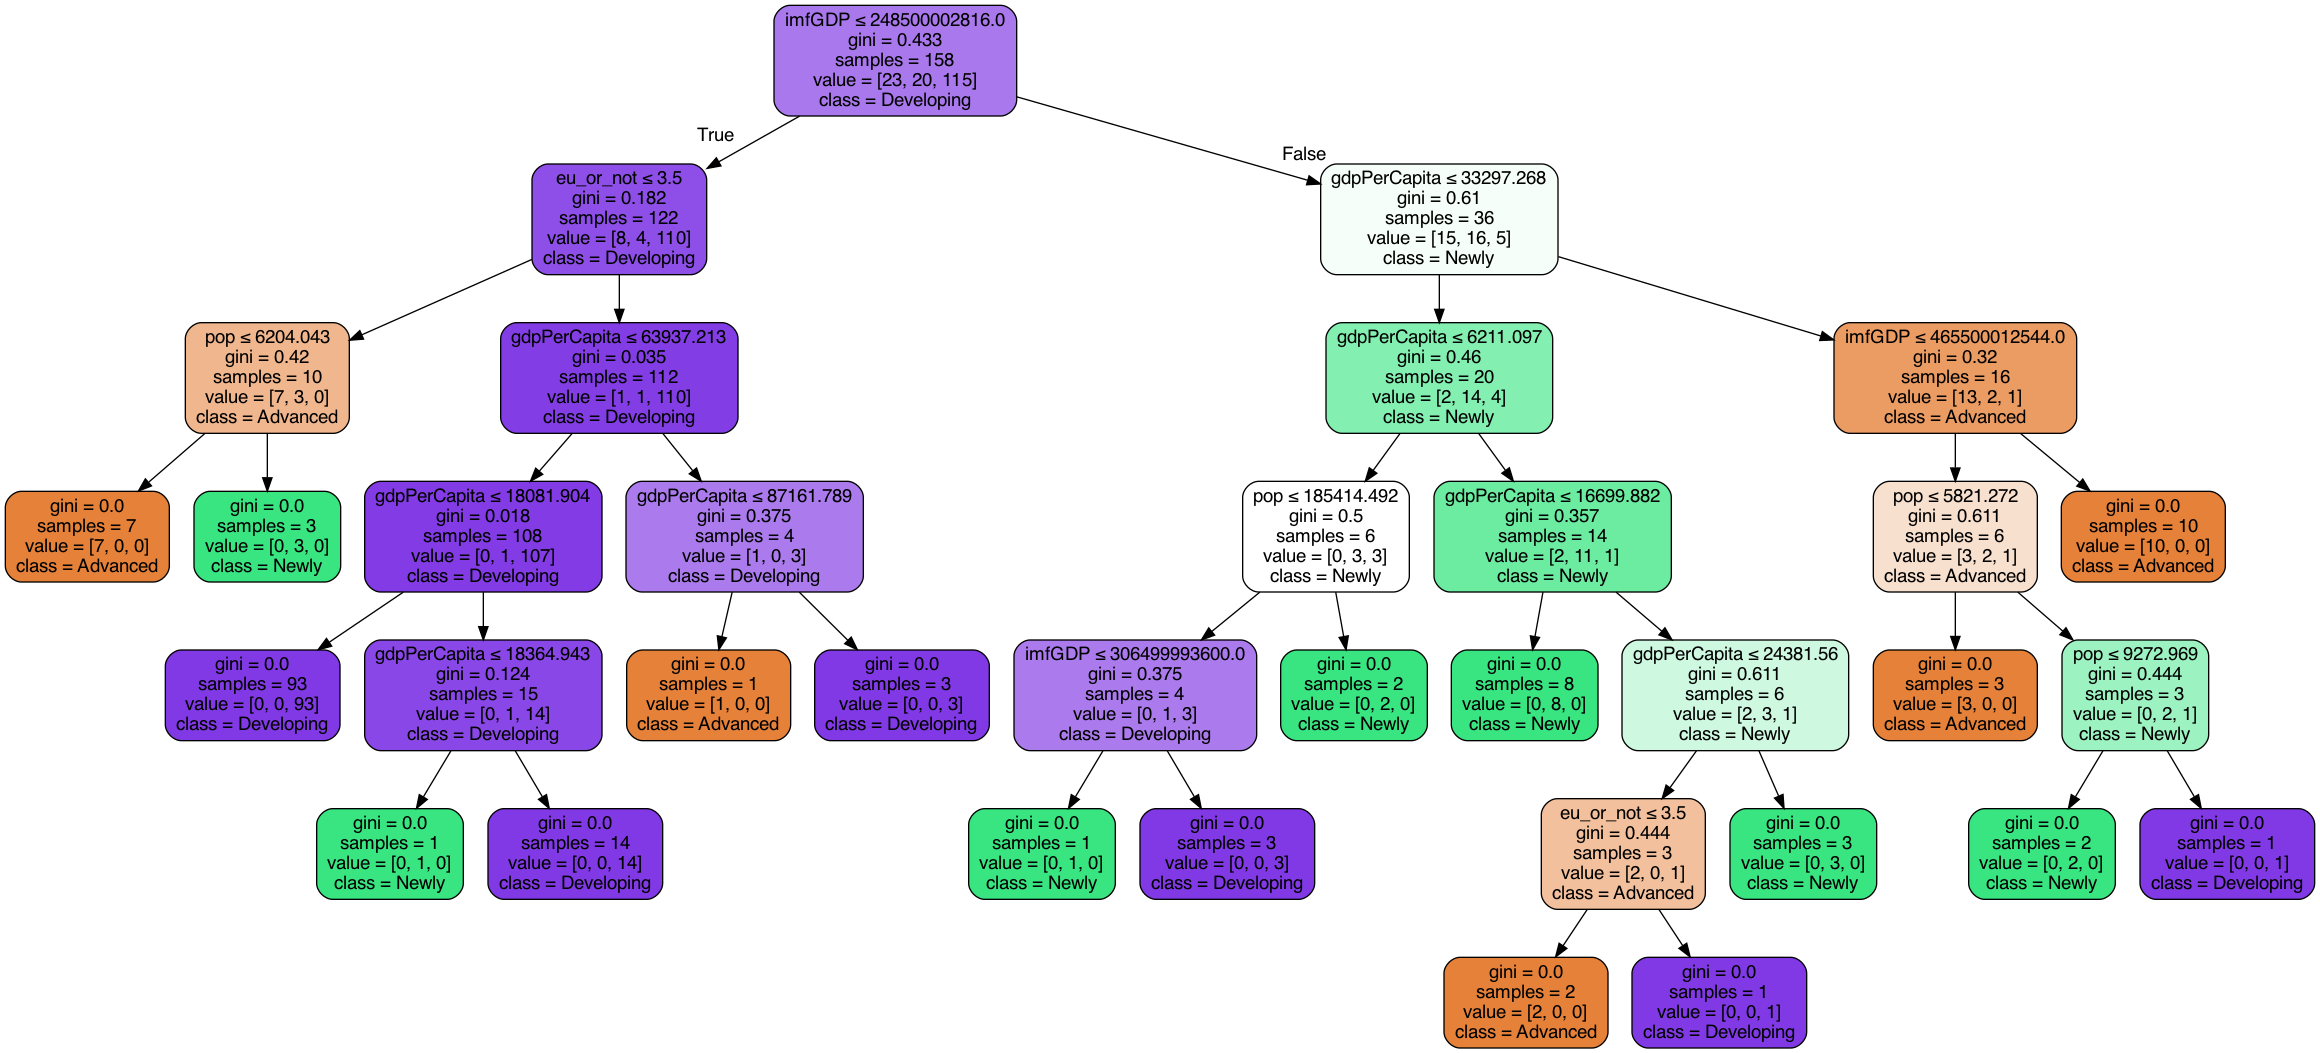

In [20]:
Image(dt_graph.create_png())

1. **Purple** means that it is **developing country**. The most powerful criteria is **imfGDP** label.
2. Naturally, **Advanced** country usually gets higher GDP. Therefore we can easily find that **advanced** country is in **right-hand** side with **orange** color.
3. Likewise, the most powerfull critera showing wheter it is **Newly** industrializing country or not is **gdpPerCapita**.
4. Country which gdpPerCapita is below 34299.131 can be classified as Newly industrializing country as mentioned above.
5. The most interesting thing is, although some of countries seems like Developing country because of **imfGDP** values, that countries are classified as advacned with **eu_or_not**.
7. Countries like **Slovenia** are classified as **advanced** country just because they are in **EU**.

## 7. Evaluation

In [21]:
y_predict = dt_clf.fit(X_train, y_train).predict(X_test)

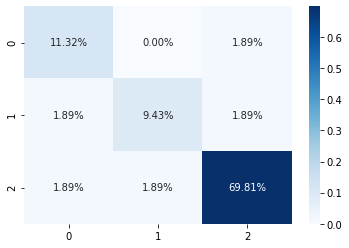

In [22]:
cf = confusion_matrix(y_test, y_predict)
sns.heatmap(cf/np.sum(cf), annot = True, fmt = '.2%', cmap = 'Blues')

In [23]:
print('Test Set Accuracy: {:.3f}'.format(dt_clf.score(X_test, y_test)))

Test Set Accuracy: 0.906


1. There are few missing values in **imfGDP** label as shown below.
2. If we can replace that values appropriately, then we will get better accuracy scores.

In [24]:
X[len(X) - 5:]

array([[0.00000000e+00, 1.27893080e+03, 2.20892340e+05, 4.00000000e+00],
       [0.00000000e+00, 2.24968653e+04, 1.50030000e+01, 4.00000000e+00],
       [0.00000000e+00, 1.89028040e+03, 4.38492600e+04, 4.00000000e+00],
       [0.00000000e+00, 1.26641380e+03, 1.75006580e+04, 4.00000000e+00],
       [0.00000000e+00, 2.36989047e+04, 3.87170000e+01, 4.00000000e+00]])